In [2]:
import requests
import pandas as pd
from IPython.display import display

In [12]:
urlpais = (f"https://covid19-brazil-api.now.sh/api/report/v1/countries")
responsepais = requests.get(urlpais)
contentpais = responsepais.json()

In [29]:
listapaises = []
listamortes = []
for item in contentpais['data']:
    listapaises.append(item['country'])
    listamortes.append(item['deaths'])

df = pd.DataFrame({
    "País": listapaises,
    "Mortes": listamortes
})

above50k = df[df['Mortes'] > 50000]
above50k.sort_values(axis=0, by=["Mortes"])
display(above50k)

,País,Mortes
6,Argentina,115989
23,Brazil,607922
37,Colombia,127311
62,France,118632
66,Germany,95767
79,India,458437
80,Indonesia,143423
81,Iran,126456
85,Italy,132120
115,Mexico,288365


## Juntando tabelas externas

In [10]:
df1 = pd.read_excel("1º Turno/rodadas1-8.xlsx", sheet_name="tabestbr2021")
    
df2 = pd.read_excel("1º Turno/rodadas9-17.xlsx", sheet_name="tabestbr2021")

df3 = pd.read_excel("1º Turno/rodadas18-19.xlsx", sheet_name="tabestbr2021")

frames = [df1, df2, df3]

result = pd.concat(frames)

In [12]:
result.to_excel("TabEst1Turno.xlsx", sheet_name="tabestbr2021_1t", index=False)

## Aplicando análise de dados

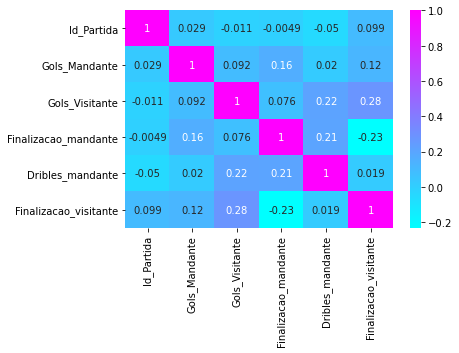

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(result.corr(), annot=True, cmap="cool")
plt.show()